In [1]:
# Importing the necessary library
import librosa
import pandas as pd
import os
import numpy as np
import re
from enum import Enum
import IPython.display as ipd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
import sklearn.preprocessing as sk
from sklearn.model_selection import train_test_split
import pickle
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns


# Visualising the audio

In [2]:
# analysing the output of librosa.load(audio file)
audio_path = "E:\\personal files\\dataset\\Language Detection Dataset\\Malayalam\\9999.mp3"
y, sr = librosa.load(audio_path)
print("The {} is stored as:- {} format with a shape of: {}".format(audio_path,type(y),y.shape))
print("The format of the sampling rate is:- ",type(sr))

The E:\personal files\dataset\Language Detection Dataset\Malayalam\9999.mp3 is stored as:- <class 'numpy.ndarray'> format with a shape of: (109831,)
The format of the sampling rate is:-  <class 'int'>


In [3]:
# playing the audio file
ipd.Audio(audio_path)

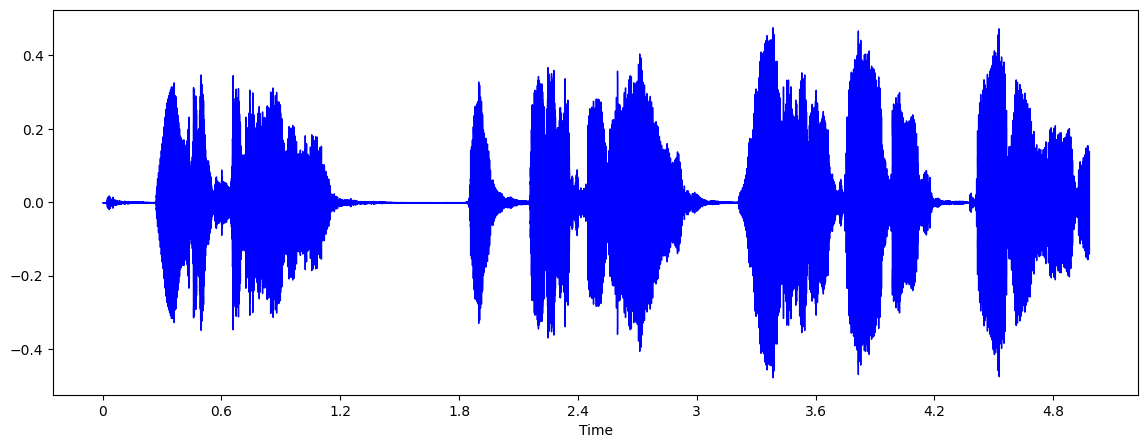

In [4]:
# displaying the audio file in the wave format.
y, sr = librosa.load(audio_path)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr, color='blue')

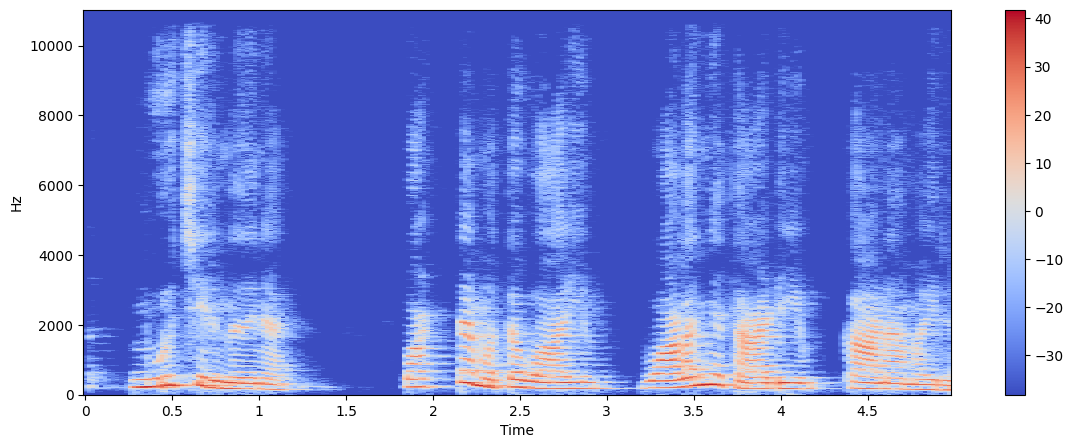

In [5]:
#display Spectrogram
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

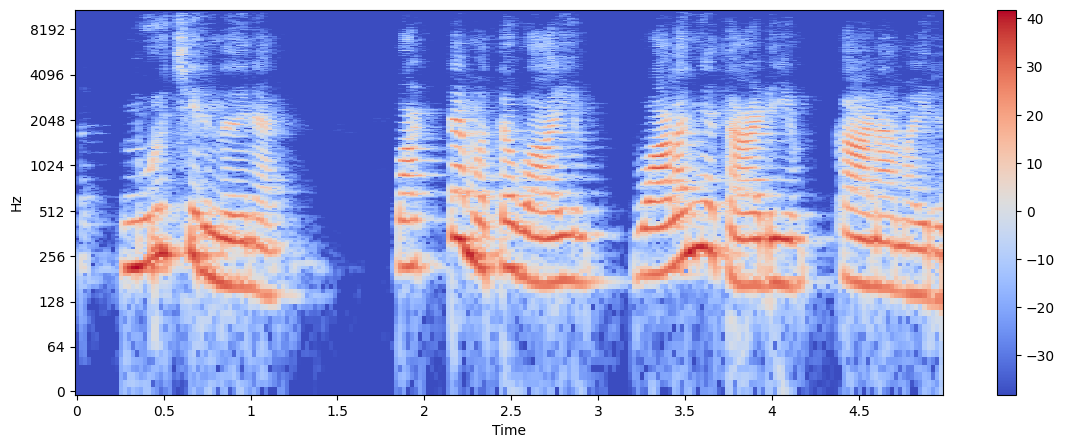

In [6]:
# plotting Spectrogram based on the log of frequencies
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

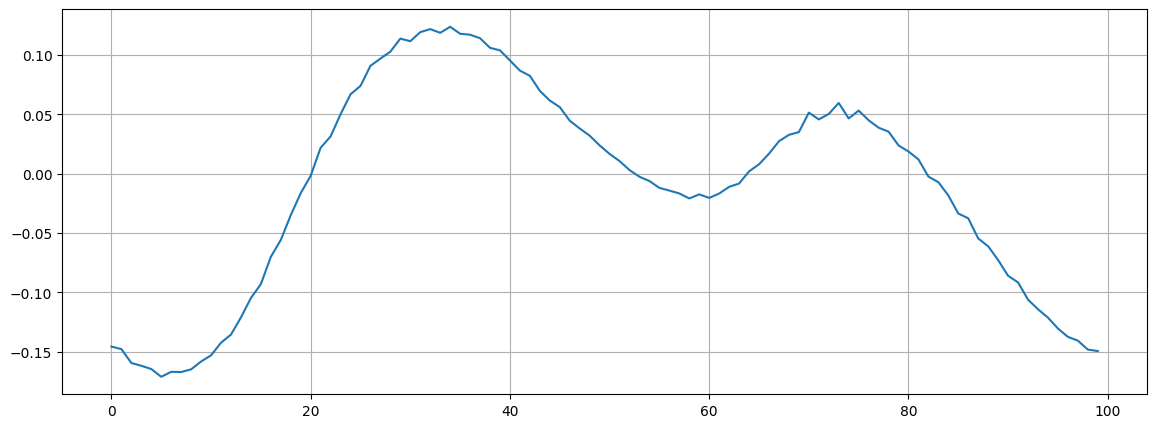

In [7]:
# Zooming in
# This code zooms in on a specific segment of an audio signal (defined by the indices n0 and n1) and plots the waveform of that segment, 
# providing a detailed view of the audio signal in that particular range. 
# This type of visualization is often useful in audio analysis to inspect specific portions of the signal for characteristics such as amplitude, frequency content, or other features.

n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(y[n0:n1])
plt.grid()


In [8]:
# In audio analysis, zero-crossings are often used as a feature to characterize the rate of change in the audio signal. 
# A high number of zero-crossings can indicate a signal with rapid changes in amplitude, which might be associated with percussive or high-frequency components.
# This information can be valuable for tasks such as audio classification or segmentation.

zero_crossings = librosa.zero_crossings(y[n0:n1], pad=False)
print(sum(zero_crossings))

4


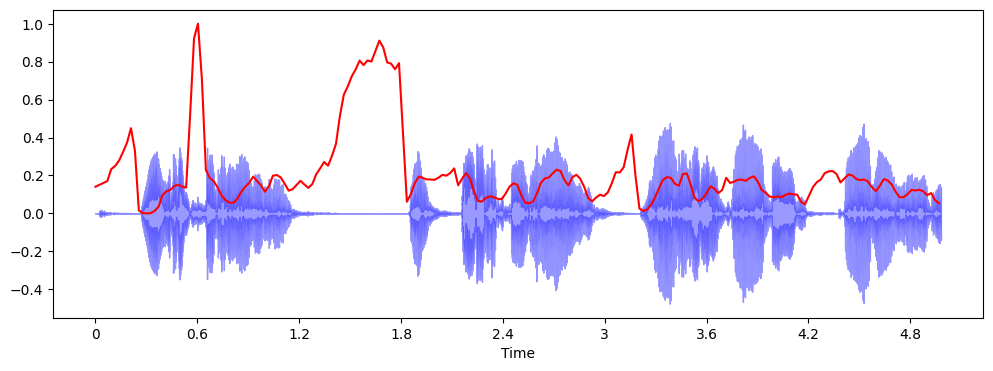

In [9]:
# spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound

# spectral_centroids = librosa.feature.spectral_centroid(y, sr=sr)[0]
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
spectral_centroids.shape

# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(y, axis=0):
    return sk.minmax_scale(y, axis=axis)

# Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(y, sr=sr, alpha=0.4,color='b')
plt.plot(t, normalize(spectral_centroids), color='r')

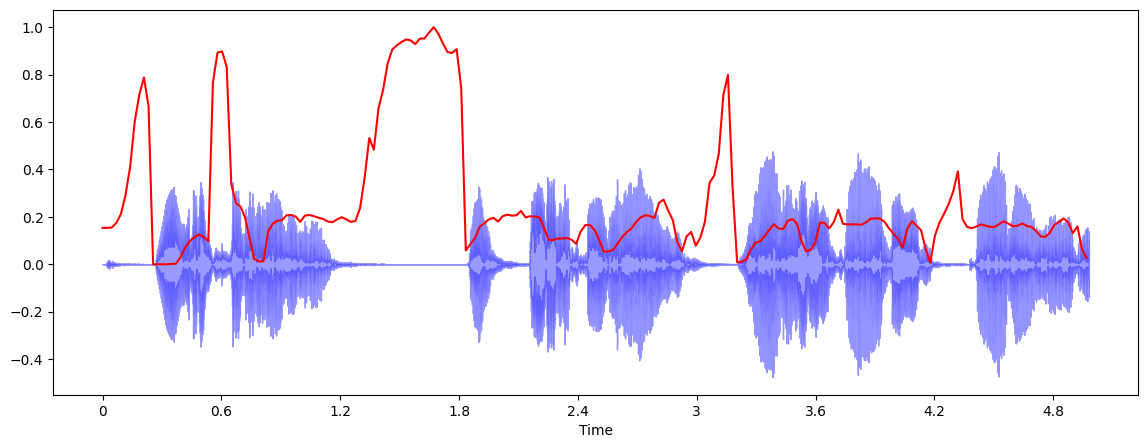

In [10]:
# generates a visual representation of an audio signal, overlaying the waveform in blue and plotting the normalized spectral rolloff in red. 
# This provides insights into the frequency content of the audio signal and highlight the regions where most of the spectral energy is concentrated. 
# The spectral rolloff information can be valuable in tasks such as music genre classification or audio content analysis.

# spectral_rolloff = librosa.feature.spectral_rolloff(y, sr=sr)[0]
spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0]
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr, alpha=0.4,color='b')
plt.plot(t, normalize(spectral_rolloff), color='r')

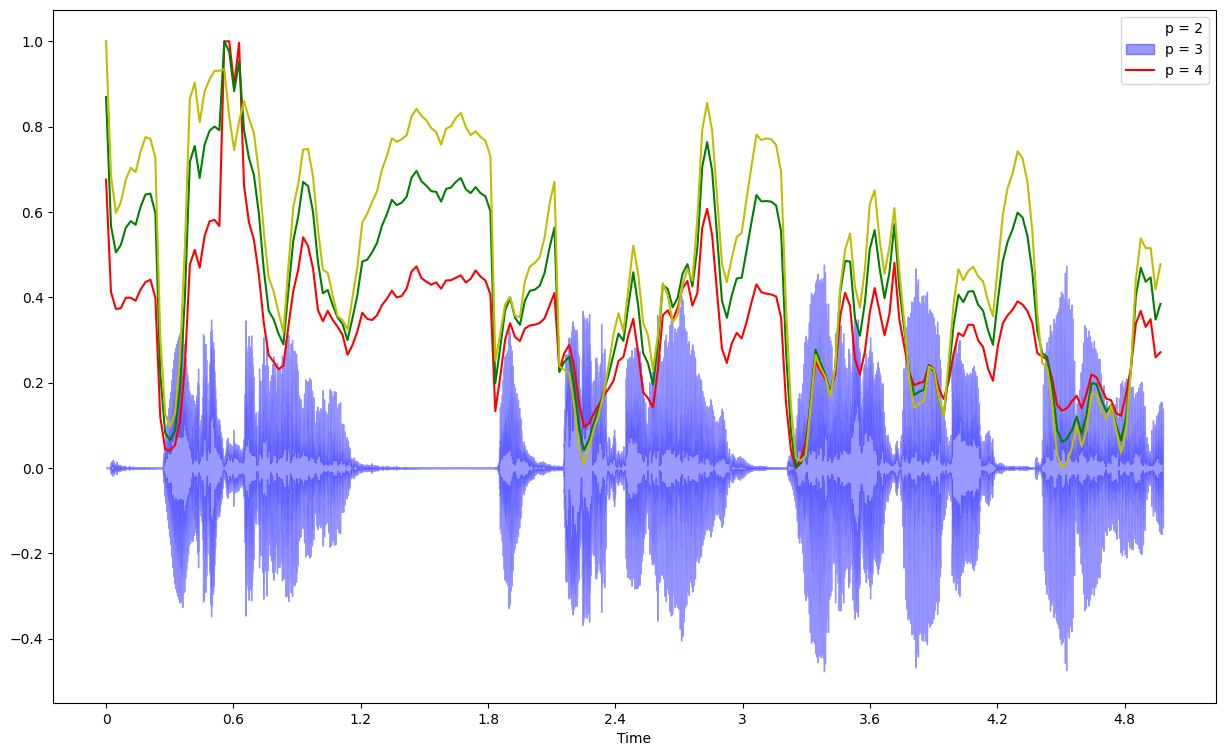

In [11]:
# visual representation of the spectral bandwidth of an audio signal for different power parameters. 
# The variations in spectral bandwidth for different 'p' values can give insights into the distribution of frequencies in the audio signal.

# spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr)[0]
# spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=3)[0]
# spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=4)[0]

spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y=y+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y=y+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y=y+0.01, sr=sr, p=4)[0]

plt.figure(figsize=(15, 9))

librosa.display.waveshow(y, sr=sr, alpha=0.4,color='b')

plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

(20, 215)


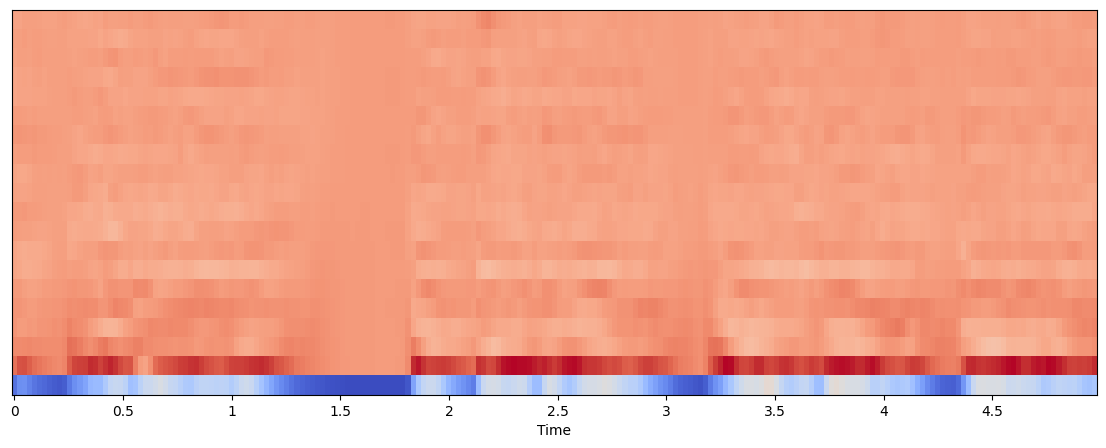

In [12]:
# computes the MFCCs of an audio signal and then displays them as a spectrogram. 
# MFCCs are commonly used in audio analysis, especially in tasks like speech and sound recognition, 
# because they capture important features of the audio signal that are relevant for distinguishing between different sounds. 
# The spectrogram visualization provides a time-frequency representation of the MFCCs, making it easier to interpret the audio features over time.

#mfccs = librosa.feature.mfcc(y, sr=sr)
mfccs = librosa.feature.mfcc(y=y, sr=sr)
print(mfccs.shape)

#Displaying  the MFCCs:
plt.figure(figsize=(14, 5))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [13]:
#load the csv file
csv_file = "Indian-Languages-dataset.csv"
data = pd.read_csv(csv_file)

In [14]:
# view the content of the csv file
data

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,spectral_rolloff,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,...,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20,target
0,0.378962,0.075027,1125.811219,1425.920156,2093.505859,-308.955444,165.863541,3.930830,32.273251,-2.041555,...,-5.752131,3.574875,-6.512062,2.243742,-7.150901,-2.844063,4.184847,-6.980238,-1.396759,Bengali
1,0.287429,0.063527,1412.054155,1389.028518,2676.877612,-386.766846,105.597565,-9.236642,4.014803,-20.703848,...,-11.379738,-9.108733,-9.926735,-12.386802,-12.014412,-11.111788,-11.034115,-6.772056,-1.708903,Bengali
2,0.316048,0.040670,1184.343827,1540.363703,2214.630127,-345.120148,148.906219,2.951180,32.668137,4.811650,...,-2.420877,-1.027839,-8.038761,5.174530,-6.478632,-3.911777,-1.346703,-8.291836,-3.059640,Bengali
3,0.411928,0.017616,2031.350046,2013.132632,3517.837524,-432.344208,89.948135,25.313305,27.641470,0.834175,...,-7.596026,-3.610270,-6.292057,7.524813,-5.277964,-1.620879,3.585401,-5.590199,-0.222281,Bengali
4,0.406019,0.080238,1196.565555,1409.005715,2343.978882,-284.833954,160.558426,-19.859289,27.079098,15.183290,...,-7.743143,-4.167504,-5.366697,1.747028,-0.969140,-4.651461,-0.426741,-4.374632,-3.327914,Bengali
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200005,0.310689,0.101095,1365.126402,1576.508099,2842.182504,-245.953781,142.667892,2.381291,48.124504,-24.362936,...,-4.983401,-14.418564,-0.446700,-4.257560,-8.768637,-7.270321,-3.597825,-10.919348,-9.119652,Urdu
200006,0.395794,0.047265,1239.926507,1950.148159,2607.710775,-374.015839,107.454086,32.323944,32.834736,18.155605,...,7.187055,-3.031203,2.224386,5.963214,-2.875483,-3.021823,4.223087,-6.168858,-0.332447,Urdu
200007,0.283828,0.070207,2192.443501,2234.239220,4344.699310,-255.315842,81.740662,-5.879892,38.831245,6.768458,...,-1.612180,-5.705421,-16.722452,-4.020082,2.737264,-11.231881,-1.340152,-1.970350,-8.344436,Urdu
200008,0.405081,0.021547,2042.093097,2090.291453,4100.779215,-427.472656,118.264175,11.115503,6.254738,6.532022,...,-7.201224,-12.990973,5.448435,3.633709,-16.944933,-9.034271,3.456671,-11.581543,-4.816901,Urdu


In [15]:
# print the first row of the csv file to get an idea of the scale of values in each column
data.iloc[0].values

array([0.3789621, 0.075027354, 1125.8112189873002, 1425.9201556681014,
       2093.505859375, -308.9554443359375, 165.86354064941406,
       3.930830001831055, 32.273250579833984, -2.041555404663086,
       5.988939762115479, -6.123610973358154, -0.8448246121406555,
       -8.729618072509766, 2.230552911758423, -3.789223909378052,
       -5.75213098526001, 3.5748753547668457, -6.512061595916748,
       2.243741989135742, -7.150901317596436, -2.8440632820129395,
       4.184847354888916, -6.98023796081543, -1.396758794784546,
       'Bengali'], dtype=object)

In [16]:
# print the column names of the dataframe
data.columns

Index(['chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth',
       'spectral_rolloff', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5',
       'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12',
       'mfcc_13', 'mfcc_14', 'mfcc_15', 'mfcc_16', 'mfcc_17', 'mfcc_18',
       'mfcc_19', 'mfcc_20', 'target'],
      dtype='object')

In [17]:
# information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200010 entries, 0 to 200009
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   chroma_stft         200010 non-null  float64
 1   rmse                200010 non-null  float64
 2   spectral_centroid   200010 non-null  float64
 3   spectral_bandwidth  200010 non-null  float64
 4   spectral_rolloff    200010 non-null  float64
 5   mfcc_1              200010 non-null  float64
 6   mfcc_2              200010 non-null  float64
 7   mfcc_3              200010 non-null  float64
 8   mfcc_4              200010 non-null  float64
 9   mfcc_5              200010 non-null  float64
 10  mfcc_6              200010 non-null  float64
 11  mfcc_7              200010 non-null  float64
 12  mfcc_8              200010 non-null  float64
 13  mfcc_9              200010 non-null  float64
 14  mfcc_10             200010 non-null  float64
 15  mfcc_11             200010 non-nul

In [18]:
# get a statistical description of the data
data.describe()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,spectral_rolloff,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,...,mfcc_11,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20
count,200010.000000,200010.000000,200010.000000,200010.000000,200010.000000,200010.000000,200010.000000,200010.000000,200010.000000,200010.000000,...,200010.000000,200010.000000,200010.000000,200010.000000,200010.000000,200010.000000,200010.000000,200010.000000,200010.000000,200010.000000
mean,0.341058,0.076823,1766.419408,1849.312654,3382.256643,-323.190547,113.511954,-11.778064,17.143010,-2.207141,...,-6.634426,-3.423041,-6.691296,-2.933960,-4.051765,-3.544513,-5.357132,-2.189326,-5.005102,-3.081437
std,0.071011,0.063974,516.830048,422.718954,1062.871154,100.983915,27.875300,32.881904,14.876341,18.952638,...,6.812019,6.211282,6.300460,6.228000,5.524365,5.086720,4.526998,4.543506,4.563697,3.811247
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1131.371216,-17.775314,-146.905228,-50.994740,-85.229355,...,-45.528961,-31.544363,-39.359066,-32.364548,-27.840939,-35.284439,-29.101128,-28.291042,-32.492710,-32.354282
25%,0.287664,0.035039,1441.017543,1564.566143,2682.997059,-368.873802,96.145855,-23.540272,5.725979,-8.664745,...,-11.297835,-7.443339,-11.056283,-7.026200,-7.373198,-6.696987,-8.262477,-5.248013,-7.941095,-5.449979
50%,0.341245,0.058727,1707.390636,1842.027821,3275.090535,-319.336609,116.967552,-5.345234,16.385271,0.000000,...,-6.896517,-3.425084,-6.013908,-3.672193,-3.815184,-3.069606,-5.270985,-1.642563,-5.377712,-3.307471
75%,0.389243,0.090075,1988.261423,2101.530271,3877.272542,-270.518463,133.224346,9.365844,27.239003,9.219613,...,-2.459812,0.479404,-2.273662,0.410485,-0.464327,-0.042250,-2.207123,0.971435,-2.294286,-0.965914
max,0.917059,0.577615,5759.898764,3774.934681,9409.008221,13.699242,238.157516,102.101715,106.610619,71.204552,...,30.158667,30.726130,31.538927,25.660173,29.433971,27.134630,33.598942,36.700474,27.651590,24.092113


In [19]:
# define the target variable
target_column_name = 'target'

# Extract the target column
target_column = data[target_column_name]

# Drop the target column for scaling
df_features = data.drop(columns=[target_column_name])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the features
df = pd.DataFrame(scaler.fit_transform(df_features), columns=df_features.columns)

# Add the target column back to the scaled DataFrame
df[target_column_name] = target_column


In [20]:
# value counts of the target variable
target_column.value_counts()

target
Bengali      20001
Gujarati     20001
Hindi        20001
Kannada      20001
Malayalam    20001
Marathi      20001
Punjabi      20001
Tamil        20001
Telugu       20001
Urdu         20001
Name: count, dtype: int64

In [21]:
# print the first 5 rows of the scaled dataframe
df.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,spectral_rolloff,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,...,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20,target
0,0.413236,0.129892,0.195457,0.377734,0.222500,0.718223,0.717528,0.605750,0.528332,0.531776,...,0.414197,0.605573,0.445543,0.525268,0.450720,0.418772,0.499694,0.424188,0.548441,Bengali
1,0.313425,0.109981,0.245153,0.367961,0.284502,0.650269,0.482052,0.552870,0.349033,0.412478,...,0.323823,0.426674,0.386694,0.269824,0.372803,0.286911,0.265526,0.427649,0.542911,Bengali
2,0.344632,0.070411,0.205619,0.408050,0.235373,0.686640,0.651271,0.601816,0.530838,0.575585,...,0.467693,0.540653,0.419231,0.576439,0.461490,0.401744,0.414582,0.402380,0.518982,Bengali
3,0.449183,0.030498,0.352671,0.533289,0.373880,0.610466,0.420905,0.691621,0.498944,0.550159,...,0.384586,0.504229,0.449334,0.617474,0.480726,0.438281,0.490471,0.447299,0.569248,Bengali
4,0.442740,0.138912,0.207741,0.373253,0.249121,0.739288,0.696799,0.510210,0.495376,0.641885,...,0.382223,0.496369,0.465282,0.516596,0.549757,0.389946,0.428738,0.467510,0.514229,Bengali


In [22]:
# print the first 5 rows of the original dataframe for comparison
data.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,spectral_rolloff,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,...,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20,target
0,0.378962,0.075027,1125.811219,1425.920156,2093.505859,-308.955444,165.863541,3.930830,32.273251,-2.041555,...,-5.752131,3.574875,-6.512062,2.243742,-7.150901,-2.844063,4.184847,-6.980238,-1.396759,Bengali
1,0.287429,0.063527,1412.054155,1389.028518,2676.877612,-386.766846,105.597565,-9.236642,4.014803,-20.703848,...,-11.379738,-9.108733,-9.926735,-12.386802,-12.014412,-11.111788,-11.034115,-6.772056,-1.708903,Bengali
2,0.316048,0.040670,1184.343827,1540.363703,2214.630127,-345.120148,148.906219,2.951180,32.668137,4.811650,...,-2.420877,-1.027839,-8.038761,5.174530,-6.478632,-3.911777,-1.346703,-8.291836,-3.059640,Bengali
3,0.411928,0.017616,2031.350046,2013.132632,3517.837524,-432.344208,89.948135,25.313305,27.641470,0.834175,...,-7.596026,-3.610270,-6.292057,7.524813,-5.277964,-1.620879,3.585401,-5.590199,-0.222281,Bengali
4,0.406019,0.080238,1196.565555,1409.005715,2343.978882,-284.833954,160.558426,-19.859289,27.079098,15.183290,...,-7.743143,-4.167504,-5.366697,1.747028,-0.969140,-4.651461,-0.426741,-4.374632,-3.327914,Bengali


In [23]:
# Data Splitting without "stratify" parameter in train_test_split

# Defining features and target variable
X = df.drop(['target'], axis = 1)
y = df['target']

# Performing the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Displaying the shapes of the train and test sets
print('X Training set shape:', X_train.shape)
print('y Training set shape:', y_train.shape)
print('X Test set shape:', X_test.shape)
print('y Test set shape:', y_test.shape)

X Training set shape: (160008, 25)
y Training set shape: (160008,)
X Test set shape: (40002, 25)
y Test set shape: (40002,)


In [24]:
# print the value count of target variable used for training
y_train.value_counts()

target
Punjabi      16077
Hindi        16067
Marathi      16048
Bengali      16019
Gujarati     15999
Urdu         15987
Tamil        15986
Kannada      15981
Malayalam    15965
Telugu       15879
Name: count, dtype: int64

In [25]:
# Data Splitting with "stratify" parameter in train_test_split

# Defining features and target variable
X = df.drop(['target'], axis = 1)
y = df['target']

# Performing the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#Displaying the shapes of the train and test sets
print('X Training set shape:', X_train.shape)
print('y Training set shape:', y_train.shape)
print('X Test set shape:', X_test.shape)
print('y Test set shape:', y_test.shape)

X Training set shape: (160008, 25)
y Training set shape: (160008,)
X Test set shape: (40002, 25)
y Test set shape: (40002,)


In [26]:
# print the value count of target variable used for training
y_train.value_counts()

target
Tamil        16001
Marathi      16001
Gujarati     16001
Telugu       16001
Hindi        16001
Malayalam    16001
Urdu         16001
Bengali      16001
Punjabi      16000
Kannada      16000
Name: count, dtype: int64

In [27]:
y_test.unique()

array(['Gujarati', 'Tamil', 'Bengali', 'Punjabi', 'Hindi', 'Telugu',
       'Marathi', 'Urdu', 'Kannada', 'Malayalam'], dtype=object)

In [28]:
y_test.value_counts()

target
Punjabi      4001
Kannada      4001
Gujarati     4000
Tamil        4000
Bengali      4000
Hindi        4000
Telugu       4000
Marathi      4000
Urdu         4000
Malayalam    4000
Name: count, dtype: int64

In [29]:
# defines a Python class named "Model" that inherits from the "Enum" class. 
# class "model" represent the set of machine learning model names used to classify the audio file as enumeration constants.
# By using this Model enumeration, you can refer to these machine learning model names in a more structured and readable way in your code. 
# For example, instead of using strings directly, you can use Model.LOGISTIC_REGRESSION to represent the "LogisticRegression" classifier. 
# This helps avoid typos and improves code maintainability.

class Model(Enum):
    LOGISTIC_REGRESSION = "LogisticRegression"
    RIDGE = "RidgeClassifier"
    K_NEIGHBORS = "KNeighborsClassifier"
    SVC = "SVC"
    DECISION_TREE = "DecisionTreeClassifier"
    RANDOM_FOREST = "RandomForestClassifier"
    ADA_BOOST = "AdaBoostClassifier"

In [30]:
# define a dataframe to store the values of train-accuracy, test-accuracy, precision, recall, f1-score of respective algorithms
model_results_df = pd.DataFrame(columns=[ 'Classifier', 'Train Accuracy Score', 'Test Accuracy Score', 'Precision Score', 'Recall Score', 'F1-Score'])

# define a funciton to model building
def train_test_report_for(model_type, model, X_train, X_test, y_train, y_test, index, message, best_score, save_model=True):
    global model_results_df
    """
    This function takes a model, fits it on the training data, makes predictions on the test data,
    and then prints the classification report and confusion matrix for the model.
    
    Parameters:
       model_type (Model): The type of model being used.
       model (sklearn model): The model to be used.
       X_train (DataFrame): The training data.
       X_test (DataFrame): The test data.
       y_train (Series): The training labels.
       y_test (Series): The test labels.
       index (int): The index of the row in the results DataFrame where the results are to be stored.
       save_model (bool): Whether to save the model or not.
    """
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # compute the accuracy score for test and train
    train_accuracy_score = model.score(X_train, y_train)
    test_accuracy_score = model.score(X_test, y_test)

    # calculate the precision score
    pred_precision_score = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    
    # calculate the recall score
    pred_recall_score = recall_score(y_test, y_pred, average='weighted')
    
    # calculate the F1-Score
    pred_f1_score = f1_score(y_test, y_pred, average='weighted')
    
    # Print the classification report
    print(f'Classification report for {model_type}:')
    print(classification_report(y_test, y_pred, zero_division=1))

    # Model - Confusion matrix
    model_confusion_matrix = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(10, 10))
    
    sns.heatmap(model_confusion_matrix, annot=True,  fmt='.2f', xticklabels = ['Gujarati', 'Tamil', 'Bengali', 'Punjabi', 'Hindi', 'Telugu',
       'Marathi', 'Urdu', 'Kannada', 'Malayalam'] , yticklabels = ['Gujarati', 'Tamil', 'Bengali', 'Punjabi', 'Hindi', 'Telugu',
       'Marathi', 'Urdu', 'Kannada', 'Malayalam'] )
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Store the results in the DataFrame
    model_results_df.loc[index] = [model_type.value, train_accuracy_score, test_accuracy_score, pred_precision_score, pred_recall_score, pred_f1_score]

    # Save the model if specified
    if save_model and pred_f1_score > best_score:
        # Update the best score
        best_score = pred_f1_score
        filename = 'finalised_model.sav'
        pickle.dump(model, open(filename, 'wb'))

    return best_score

Classification report for Model.LOGISTIC_REGRESSION:
              precision    recall  f1-score   support

     Bengali       0.78      0.79      0.78      4000
    Gujarati       0.46      0.41      0.43      4000
       Hindi       0.80      0.85      0.82      4000
     Kannada       0.93      0.90      0.91      4001
   Malayalam       0.90      0.92      0.91      4000
     Marathi       0.69      0.71      0.70      4000
     Punjabi       0.49      0.50      0.49      4001
       Tamil       0.85      0.87      0.86      4000
      Telugu       0.83      0.78      0.80      4000
        Urdu       0.68      0.69      0.69      4000

    accuracy                           0.74     40002
   macro avg       0.74      0.74      0.74     40002
weighted avg       0.74      0.74      0.74     40002



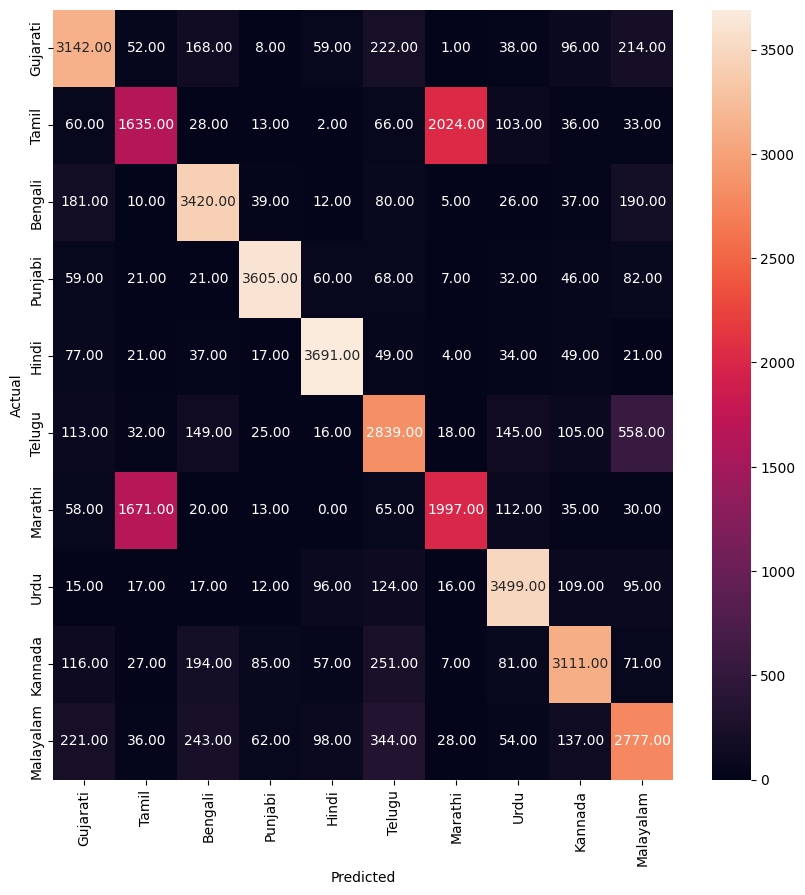

best_f1_score yet is 0.7411982290040972


,Classifier,Train Accuracy Score,Test Accuracy Score,Precision Score,Recall Score,F1-Score
1,LogisticRegression,0.741125,0.742863,0.740414,0.742863,0.741198


In [31]:
# Implementing the logistic regression classifier to the data

# Instantiate the Logistic Regression model with increased number of iterations
model_logreg = LogisticRegression(max_iter=1000, random_state=42)

# setting best_f1_score = -1 is a common practice in optimization scenarios where a lower initial value ensures that any subsequent valid value encountered will be considered an improvement.
# By initializing best_f1_score to -1, the code ensures that the first calculated F1-score will be considered as an improvement, regardless of its actual value. 
# As the code progresses and evaluates different models, the variable best_f1_score is updated only if a newly calculated F1-score is higher than the current best. 
# This way, the variable starts with a low value, and any valid F1-score encountered during the model evaluation will replace it as the new best F1-score.
best_f1_score = -1

best_f1_score = train_test_report_for(Model.LOGISTIC_REGRESSION, model_logreg, X_train, X_test, y_train, y_test, 1, "Logistic Regression X_train, y_train, X_test, y_test", best_f1_score)
print(f"best_f1_score yet is {best_f1_score}")
model_results_df

Classification report for Model.SVC:
              precision    recall  f1-score   support

     Bengali       0.98      0.98      0.98      4000
    Gujarati       0.45      0.30      0.36      4000
       Hindi       0.97      1.00      0.98      4000
     Kannada       0.99      0.97      0.98      4001
   Malayalam       0.99      0.99      0.99      4000
     Marathi       0.99      0.98      0.99      4000
     Punjabi       0.48      0.64      0.55      4001
       Tamil       1.00      0.99      0.99      4000
      Telugu       0.99      0.99      0.99      4000
        Urdu       0.98      0.98      0.98      4000

    accuracy                           0.88     40002
   macro avg       0.88      0.88      0.88     40002
weighted avg       0.88      0.88      0.88     40002



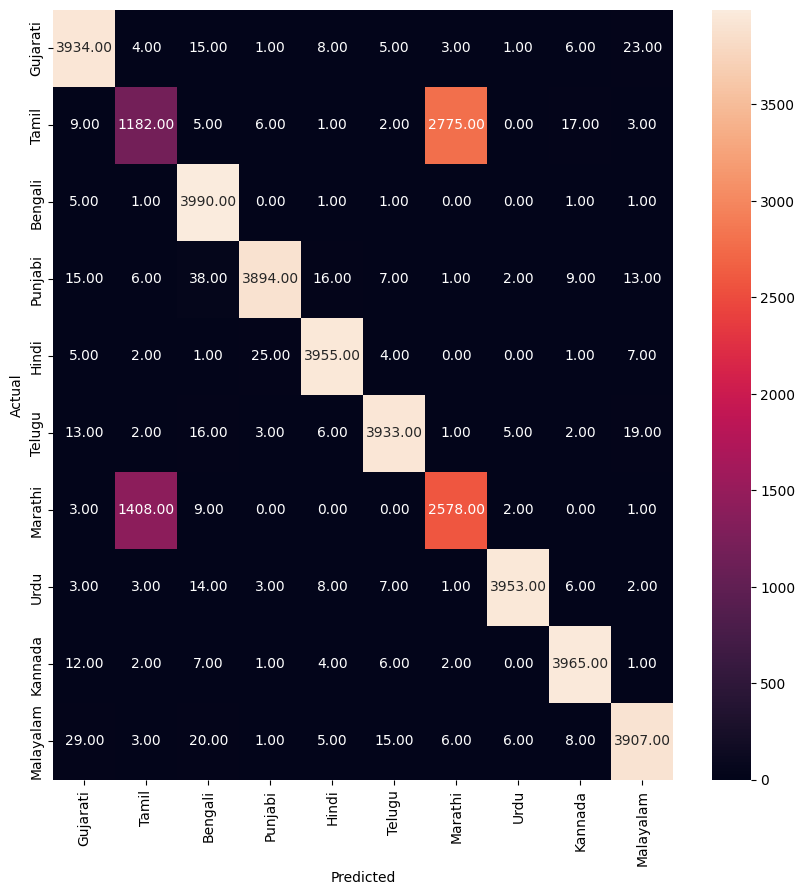

best_f1_score yet is 0.8787739597594737


,Classifier,Train Accuracy Score,Test Accuracy Score,Precision Score,Recall Score,F1-Score
1,LogisticRegression,0.741125,0.742863,0.740414,0.742863,0.741198
2,SVC,0.890455,0.882231,0.881061,0.882231,0.878774


In [32]:
# Implementing the Support Vector Classifier to the data

# Instantiate the SVC model with increased number of iterations
model_logsvc = SVC(kernel = 'rbf', probability=True, random_state = 42)

best_f1_score = -1

best_f1_score2 = train_test_report_for(Model.SVC, model_logsvc, X_train, X_test, y_train, y_test, 2, "SVC X_train, y_train, X_test, y_test", best_f1_score)
print(f"best_f1_score yet is {best_f1_score2}")
model_results_df

Classification report for Model.ADA_BOOST:
              precision    recall  f1-score   support

     Bengali       0.66      0.68      0.67      4000
    Gujarati       0.46      0.43      0.44      4000
       Hindi       0.81      0.82      0.82      4000
     Kannada       0.98      0.82      0.89      4001
   Malayalam       0.84      0.86      0.85      4000
     Marathi       0.68      0.71      0.69      4000
     Punjabi       0.49      0.49      0.49      4001
       Tamil       0.85      0.72      0.78      4000
      Telugu       0.80      0.78      0.79      4000
        Urdu       0.52      0.68      0.59      4000

    accuracy                           0.70     40002
   macro avg       0.71      0.70      0.70     40002
weighted avg       0.71      0.70      0.70     40002



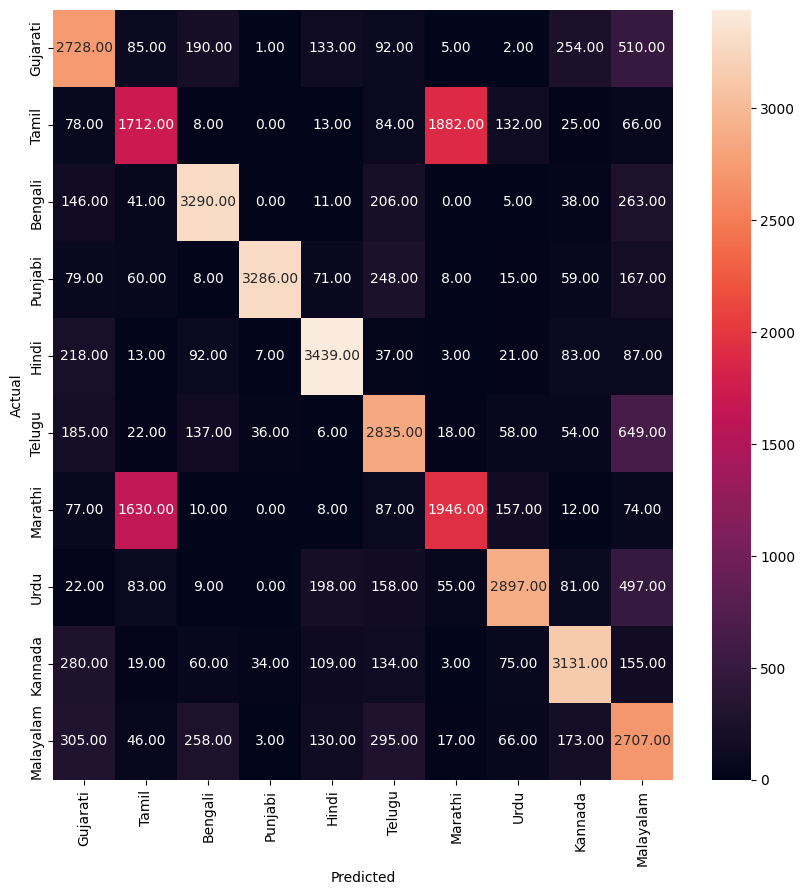

best_f1_score yet is 0.701706772358509


,Classifier,Train Accuracy Score,Test Accuracy Score,Precision Score,Recall Score,F1-Score
1,LogisticRegression,0.741125,0.742863,0.740414,0.742863,0.741198
2,SVC,0.890455,0.882231,0.881061,0.882231,0.878774
3,AdaBoostClassifier,0.694572,0.699240,0.708693,0.699240,0.701707


In [33]:
# Implementing the Adaboost classifier to the data

# Instantiate the Adaboost model with increased number of iterations
model_logada = AdaBoostClassifier(n_estimators=100, learning_rate=0.25, random_state=42)

best_f1_score = -1

best_f1_score = train_test_report_for(Model.ADA_BOOST, model_logada, X_train, X_test, y_train, y_test, 3, "AdaBoost X_train, y_train, X_test, y_test", best_f1_score)
print(f"best_f1_score yet is {best_f1_score}")
model_results_df

Classification report for Model.DECISION_TREE:
              precision    recall  f1-score   support

     Bengali       0.89      0.89      0.89      4000
    Gujarati       0.23      0.27      0.25      4000
       Hindi       0.93      0.95      0.94      4000
     Kannada       0.94      0.93      0.94      4001
   Malayalam       0.94      0.93      0.94      4000
     Marathi       0.92      0.91      0.92      4000
     Punjabi       0.14      0.12      0.13      4001
       Tamil       0.94      0.93      0.94      4000
      Telugu       0.93      0.93      0.93      4000
        Urdu       0.89      0.89      0.89      4000

    accuracy                           0.78     40002
   macro avg       0.78      0.78      0.78     40002
weighted avg       0.78      0.78      0.78     40002



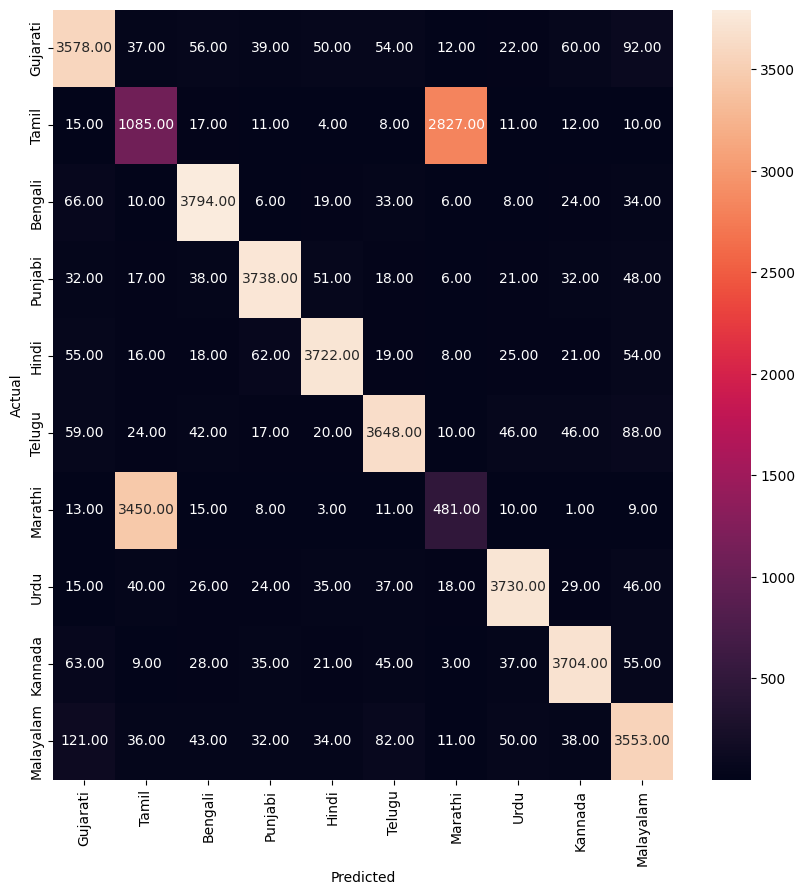

best_f1_score yet is 0.7757590038838647


,Classifier,Train Accuracy Score,Test Accuracy Score,Precision Score,Recall Score,F1-Score
1,LogisticRegression,0.741125,0.742863,0.740414,0.742863,0.741198
2,SVC,0.890455,0.882231,0.881061,0.882231,0.878774
3,AdaBoostClassifier,0.694572,0.699240,0.708693,0.699240,0.701707
4,DecisionTreeClassifier,0.937341,0.775786,0.776301,0.775786,0.775759


In [34]:
# Implementing the Decision Tree Classifier to the data

# Instantiate the Decision Tree model with increased number of iterations
model_logdectree = DecisionTreeClassifier(random_state = 42)

best_f1_score = -1

best_f1_score = train_test_report_for(Model.DECISION_TREE, model_logdectree, X_train, X_test, y_train, y_test, 4, "Decision Tree X_train, y_train, X_test, y_test", best_f1_score)
print(f"best_f1_score yet is {best_f1_score}")
model_results_df

Classification report for Model.RANDOM_FOREST:
              precision    recall  f1-score   support

     Bengali       0.94      0.98      0.96      4000
    Gujarati       0.20      0.20      0.20      4000
       Hindi       0.96      1.00      0.98      4000
     Kannada       0.99      0.96      0.97      4001
   Malayalam       0.98      0.98      0.98      4000
     Marathi       0.98      0.97      0.97      4000
     Punjabi       0.20      0.20      0.20      4001
       Tamil       0.99      0.98      0.99      4000
      Telugu       0.99      0.98      0.98      4000
        Urdu       0.98      0.96      0.97      4000

    accuracy                           0.82     40002
   macro avg       0.82      0.82      0.82     40002
weighted avg       0.82      0.82      0.82     40002



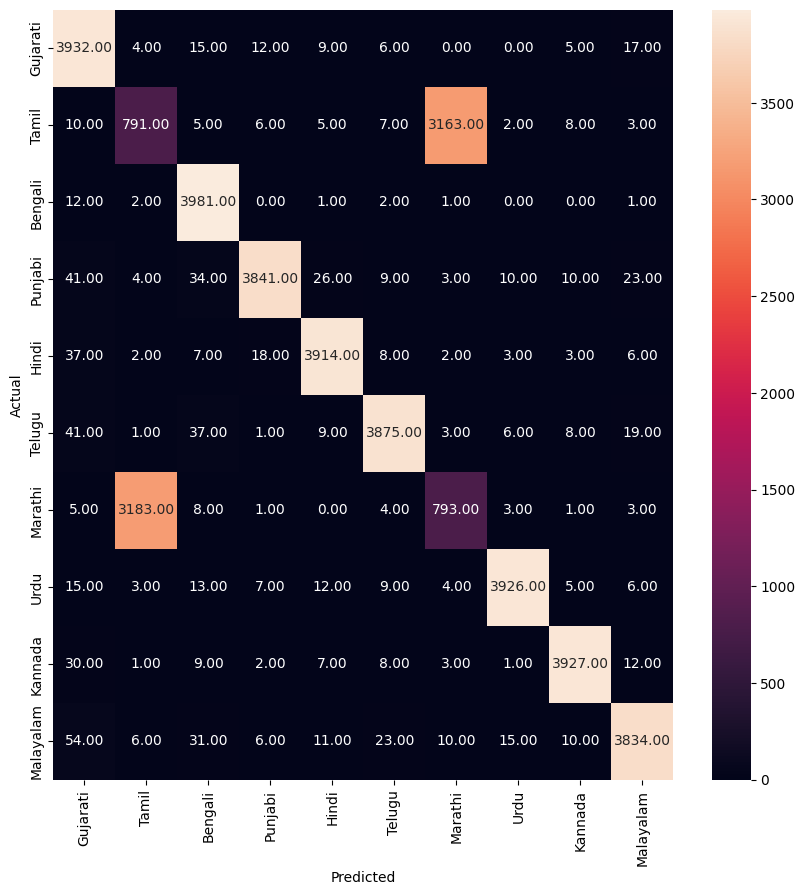

best_f1_score yet is 0.8201172226982215


,Classifier,Train Accuracy Score,Test Accuracy Score,Precision Score,Recall Score,F1-Score
1,LogisticRegression,0.741125,0.742863,0.740414,0.742863,0.741198
2,SVC,0.890455,0.882231,0.881061,0.882231,0.878774
3,AdaBoostClassifier,0.694572,0.699240,0.708693,0.699240,0.701707
4,DecisionTreeClassifier,0.937341,0.775786,0.776301,0.775786,0.775759
5,RandomForestClassifier,0.936466,0.820309,0.820140,0.820309,0.820117


In [35]:
# Implementing the Random Forest classifier to the data

# Instantiate the RandomForest Classifier model with increased number of iterations
model_logRF = RandomForestClassifier(n_estimators=10, random_state=42)

best_f1_score = -1

best_f1_score = train_test_report_for(Model.RANDOM_FOREST, model_logRF, X_train, X_test, y_train, y_test, 5, " RandomForest X_train, y_train, X_test, y_test", best_f1_score)
print(f"best_f1_score yet is {best_f1_score}")
model_results_df

Classification report for Model.K_NEIGHBORS:
              precision    recall  f1-score   support

     Bengali       0.99      0.99      0.99      4000
    Gujarati       0.29      0.29      0.29      4000
       Hindi       0.98      1.00      0.99      4000
     Kannada       1.00      0.98      0.99      4001
   Malayalam       1.00      1.00      1.00      4000
     Marathi       0.99      0.99      0.99      4000
     Punjabi       0.28      0.28      0.28      4001
       Tamil       1.00      0.99      1.00      4000
      Telugu       1.00      1.00      1.00      4000
        Urdu       0.99      0.99      0.99      4000

    accuracy                           0.85     40002
   macro avg       0.85      0.85      0.85     40002
weighted avg       0.85      0.85      0.85     40002



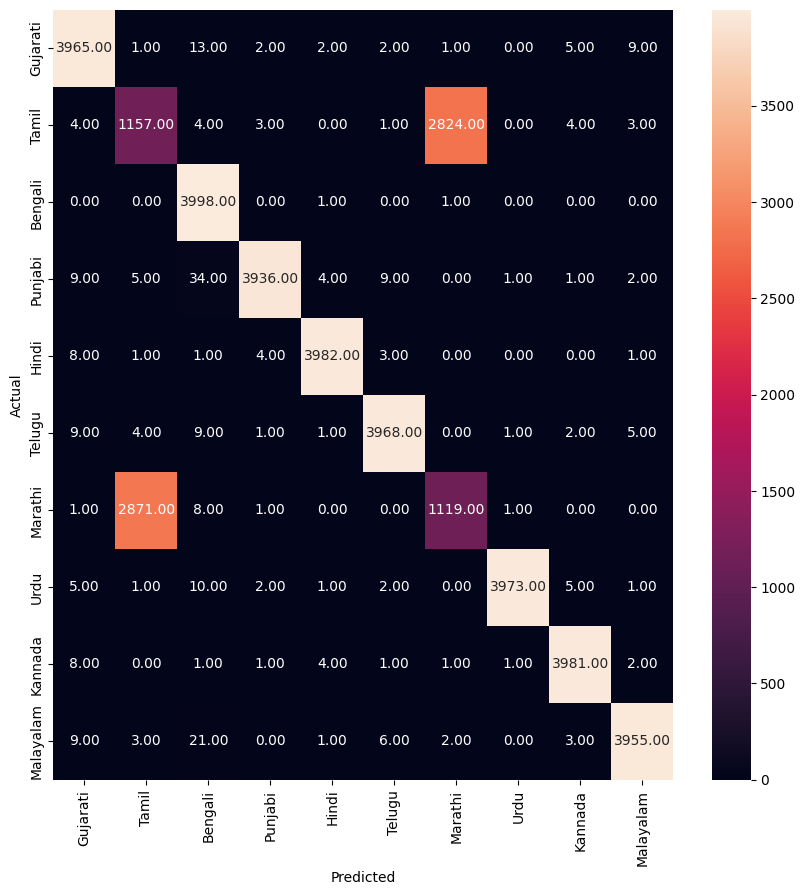

best_f1_score yet is 0.8507219189823163


,Classifier,Train Accuracy Score,Test Accuracy Score,Precision Score,Recall Score,F1-Score
1,LogisticRegression,0.741125,0.742863,0.740414,0.742863,0.741198
2,SVC,0.890455,0.882231,0.881061,0.882231,0.878774
3,AdaBoostClassifier,0.694572,0.699240,0.708693,0.699240,0.701707
4,DecisionTreeClassifier,0.937341,0.775786,0.776301,0.775786,0.775759
5,RandomForestClassifier,0.936466,0.820309,0.820140,0.820309,0.820117
6,KNeighborsClassifier,0.924385,0.850807,0.850683,0.850807,0.850722


In [36]:
# Implementing the KNN classifier to the data

# Instantiate the KNeighborsClassifier model with increased number of iterations
model_logKNN = KNeighborsClassifier(n_neighbors = 3)

best_f1_score = -1

best_f1_score = train_test_report_for(Model.K_NEIGHBORS, model_logKNN, X_train, X_test, y_train, y_test, 6, " KNN X_train, y_train, X_test, y_test", best_f1_score)
print(f"best_f1_score yet is {best_f1_score}")
model_results_df

Classification report for Model.RIDGE:
              precision    recall  f1-score   support

     Bengali       0.73      0.75      0.74      4000
    Gujarati       0.48      0.18      0.26      4000
       Hindi       0.75      0.86      0.80      4000
     Kannada       0.97      0.86      0.91      4001
   Malayalam       0.73      0.93      0.82      4000
     Marathi       0.65      0.51      0.57      4000
     Punjabi       0.49      0.60      0.54      4001
       Tamil       0.63      0.79      0.70      4000
      Telugu       0.77      0.69      0.73      4000
        Urdu       0.59      0.67      0.63      4000

    accuracy                           0.68     40002
   macro avg       0.68      0.68      0.67     40002
weighted avg       0.68      0.68      0.67     40002



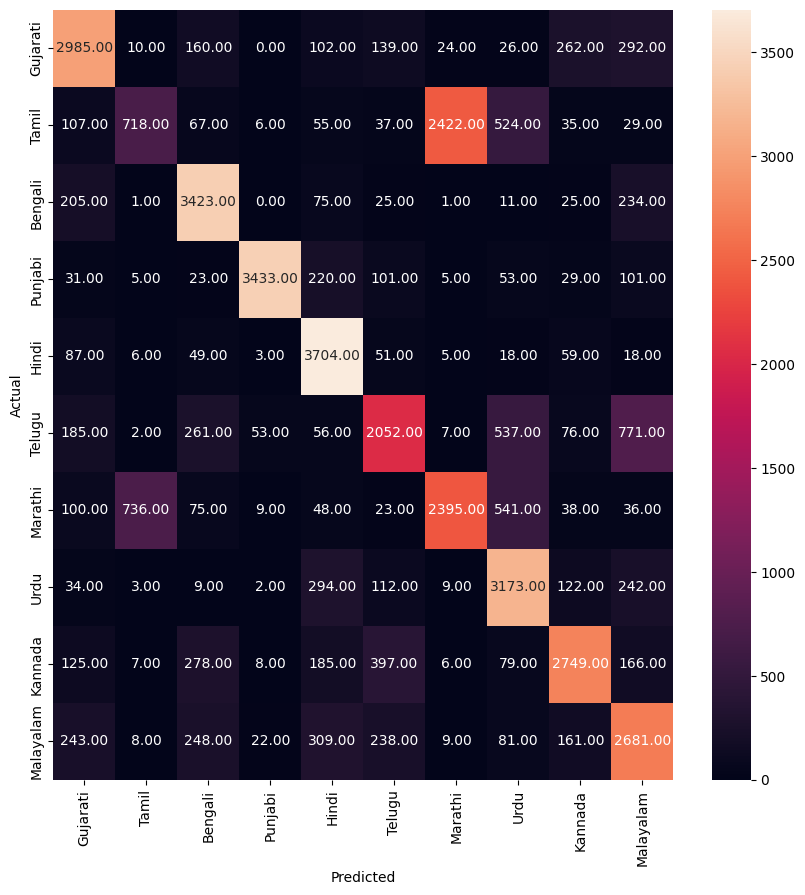

best_f1_score yet is 0.6690796505880628


,Classifier,Train Accuracy Score,Test Accuracy Score,Precision Score,Recall Score,F1-Score
1,LogisticRegression,0.741125,0.742863,0.740414,0.742863,0.741198
2,SVC,0.890455,0.882231,0.881061,0.882231,0.878774
3,AdaBoostClassifier,0.694572,0.699240,0.708693,0.699240,0.701707
4,DecisionTreeClassifier,0.937341,0.775786,0.776301,0.775786,0.775759
5,RandomForestClassifier,0.936466,0.820309,0.820140,0.820309,0.820117
6,KNeighborsClassifier,0.924385,0.850807,0.850683,0.850807,0.850722
7,RidgeClassifier,0.679547,0.682791,0.678324,0.682791,0.669080


In [37]:
# Implementing the Ridge classifier to the data

# Instantiate the RidgeClassifier model with increased number of iterations
model_logridge = RidgeClassifier(random_state = 42)

best_f1_score = -1

best_f1_score = train_test_report_for(Model.RIDGE, model_logridge, X_train, X_test, y_train, y_test, 7, "Ridge X_train, y_train, X_test, y_test", best_f1_score)
print(f"best_f1_score yet is {best_f1_score}")
model_results_df

In [38]:
# function to predict on a new given audio
def predict(path):
    # Define the classifier used
    classifier = ["LogisticRegression","RidgeClassifier","KNeighborsClassifier","SVC","DecisionTreeClassifier","RandomForestClassifier","AdaBoostClassifier"]

    # Load the audio file
    y, sr = librosa.load(path) 

    # Compute the important features of the audio file
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr) 
    rmse = librosa.feature.rms(y=y) 
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)  
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    mfccs = librosa.feature.mfcc(y=y, sr=sr)

    #compute the mean values for the extracted features and store is as a list
    features = [chroma_stft.mean(), rmse.mean(), spectral_centroid.mean(),
                spectral_bandwidth.mean(), spectral_rolloff.mean()] + mfccs.mean(axis=1).tolist()
    
    # scale the features after converting it to an array
    # a = np.array(features).reshape(1, -1)
    a = scaler.transform(np.array(features).reshape(1, -1))

    #define a dataframe to store the prediction and actual output
    model_pred_df = pd.DataFrame(columns=['Classifier', 'Actual','Prediction'])

    # Regular expression pattern to extract "x.wav" from the audio path
    pattern = r'\\([^\\]+\.mp3)$'

    # Extract "x.mp3" from each string
    result = [re.search(pattern, path).group(1) if re.search(pattern, path) else None for path in path.split(';')]

    # Remove the '-test.mp3' part and save the result
    actual = [name.replace('-test.mp3', '') for name in result] # Assuming the file name will be language-test.mp3
    
    for i in range(len(classifier)):
        if i==0: 
            alg = classifier[i]
            c = model_logreg.predict(a)
        if i==1:
            alg = classifier[i]
            c = model_logridge.predict(a)
        if i==2:
            alg = classifier[i]
            c = model_logKNN.predict(a)
        if i==3:
            alg = classifier[i]
            c = model_logsvc.predict(a)
        if i==4:
            alg = classifier[i]
            c = model_logdectree.predict(a)
        if i==5:
            alg = classifier[i]
            c = model_logRF.predict(a)
        if i==6:
            alg = classifier[i]
            c = model_logada.predict(a)
             
        model_pred_df.loc[i] = [alg, actual, c]
        
    return model_pred_df

In [61]:
#file path of the testing audio
testfile_path="C:\\Users\\AKHIL JX\\Music\\Akhil ML Project\\test\\Hindi-test.mp3"

#To play the test audio
ipd.Audio(testfile_path)

In [62]:
# perform prediction on the audio file
a = predict(testfile_path)
a

C:\personal files\Installation\anaconda\envs\Akhil_env_3_11\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\personal files\Installation\anaconda\envs\Akhil_env_3_11\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\personal files\Installation\anaconda\envs\Akhil_env_3_11\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RidgeClassifier was fitted with feature names
  warnings.warn(
C:\personal files\Installation\anaconda\envs\Akhil_env_3_11\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\personal files\Installation\anaconda\envs\Akhil_env_3_11\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have val

,Classifier,Actual,Prediction
0,LogisticRegression,[Hindi],[Hindi]
1,RidgeClassifier,[Hindi],[Hindi]
2,KNeighborsClassifier,[Hindi],[Hindi]
3,SVC,[Hindi],[Hindi]
4,DecisionTreeClassifier,[Hindi],[Marathi]
5,RandomForestClassifier,[Hindi],[Hindi]
6,AdaBoostClassifier,[Hindi],[Gujarati]


In [63]:
model_results_df

,Classifier,Train Accuracy Score,Test Accuracy Score,Precision Score,Recall Score,F1-Score
1,LogisticRegression,0.741125,0.742863,0.740414,0.742863,0.741198
2,SVC,0.890455,0.882231,0.881061,0.882231,0.878774
3,AdaBoostClassifier,0.694572,0.699240,0.708693,0.699240,0.701707
4,DecisionTreeClassifier,0.937341,0.775786,0.776301,0.775786,0.775759
5,RandomForestClassifier,0.936466,0.820309,0.820140,0.820309,0.820117
6,KNeighborsClassifier,0.924385,0.850807,0.850683,0.850807,0.850722
7,RidgeClassifier,0.679547,0.682791,0.678324,0.682791,0.669080


In [64]:
# Merge the two dataframes based on the "Classifier" column to get complete description of the output of each classifier
output = pd.merge(model_results_df,a, on='Classifier')

In [65]:
output

,Classifier,Train Accuracy Score,Test Accuracy Score,Precision Score,Recall Score,F1-Score,Actual,Prediction
0,LogisticRegression,0.741125,0.742863,0.740414,0.742863,0.741198,[Hindi],[Hindi]
1,SVC,0.890455,0.882231,0.881061,0.882231,0.878774,[Hindi],[Hindi]
2,AdaBoostClassifier,0.694572,0.699240,0.708693,0.699240,0.701707,[Hindi],[Gujarati]
3,DecisionTreeClassifier,0.937341,0.775786,0.776301,0.775786,0.775759,[Hindi],[Marathi]
4,RandomForestClassifier,0.936466,0.820309,0.820140,0.820309,0.820117,[Hindi],[Hindi]
5,KNeighborsClassifier,0.924385,0.850807,0.850683,0.850807,0.850722,[Hindi],[Hindi]
6,RidgeClassifier,0.679547,0.682791,0.678324,0.682791,0.669080,[Hindi],[Hindi]


### from the above report, we can see that SVC performs the best compared to others, so lets do a grid searchcv on svc to see whether we can increase the performance

In [53]:
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

In [54]:
from sklearn import svm
svm_classifier = svm.SVC()

In [55]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(svm_classifier, param_grid_svm, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Store the best parameters and the corresponding accuracy
a = grid_search.best_params_
b = grid_search.best_score_

# Print the best parameters and the corresponding accuracy
print("The best parameters for SVC model is:- ",a)
print("The train accuracy for SVC model is:- ",b)

grid_search.fit(X_test,y_test)

c = grid_search.best_score_

print("The test accuracy for SVC model is:- ",c)

The best parameters for SVC model is:-  {'C': 10, 'kernel': 'rbf'}
The train accuracy for SVC model is:-  0.8847307634618269
The test accuracy for SVC model is:-  0.8853307334633268


In [56]:
# since the accuracy didnt increase much, we can say that the SVC model was trained on optimal parameters

# .......................................................... Thank You ..........................................................